# **MARKET SEGMENTATION AND PRODUCT DEVELOPMENT STRATEGIES**
----------------------------------------------------------------- 



The research topic is "Market Segmentation and Product Development Strategies." This research addresses a important component of modern business strategy, especially in the rapidly growing e-commerce sector. One way for online retailers to gain competitive advantage, increase customer satisfaction and drive profitability is by understanding how to efficiently segment markets and develop products that suit particular groups of customers. This implies that businesses must understand who their customers are exactly before designing a product or service for them. Furthermore, as big data and advanced analytics continue to rise, there are new opportunities for using customer data in making more informed decisions about markets. The aim of this research is bridging the gap between market segmentation insights and practical product development strategies that ultimately lead to better business outcomes. 
<br>
<br>


# **1.0 Introduction**
-------------------------


In this notebook, we utilize the publicly available Online Retail dataset to explore customer segmentation and provide product development strategies based on the customer data.

### 1.1 Dataset Introduction

The <a href="https://www.kaggle.com/datasets/puneetbhaya/online-retail"> Online Retail </a>  a transnational data set which contains all the transactions occurring between `01/12/2010` and `09/12/2011` for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Additional variable information**

1. **InvoiceNo:** A unique identifier for the invoice. An invoice number shared across rows means that those transactions were performed in a single invoice (multiple purchases). 
2. **StockCode:** Identifier for items contained in an invoice.<br>
3. **Description:** Textual description of each of the stock item.<br>
4. **Quantity:** The quantity of the item purchased.<br>
5. **InvoiceDate:** Date of purchase.<br>
6. **UnitPrice:** Value of each item.<br>
7. **CustomerID:** Identifier for customer making the purchase.<br>
8. **Country:** Country of customer.<br>

<br>

## 1.2 Import Libraries
-----------------------

Import all the necessary libraries required for the analysis of customer data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')



## 1.3 Import Dataset
-----------------------

Importing the Online Retail dataset from an Excel file into a pandas **DataFrame**. This will allow us to easily **manipulate** and analyze the data using Python's powerful data analysis libraries.
<br>
<br>

In [2]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<br>

It's important to understand the overall size of the dataset, including the number of rows (transactions) and columns (attributes).

In [3]:
df.shape

(541909, 8)

# **2.0 Cleansing Dataset**
-----------------------------

Before proceeding with any analysis, it's essential to check for **missing values** in the dataset. Missing values can affect the quality of analysis, so we need to identify and address them appropriately (e.g., by removing or imputing the missing data).

In [4]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
# Dropping rows with missing values
df = df.dropna()

# Checking the new dimensions of the dataset
df.shape


(406829, 8)

<br>

It's important to verify the **data types** of each column in the dataset to ensure they are correctly formatted for analysis. This step helps identify if any columns need to be converted (e.g., dates, numerical values) before further processing.

In [6]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

<br>
Re-checking for missing values in the dataset

In [7]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64



## 2.1 Cleaning String Data and Data Types
-------------------------------------------

In this step, we perform several data cleaning tasks to standardize and format the dataset appropriately. These tasks include:

1. **Cleaning Text Data:** The `Description` column is cleaned by removing periods, converting text to uppercase, and trimming any extra spaces.
2. **Converting Data Types:** We ensure that columns such as `InvoiceNo` and `CustomerID` are treated as strings for consistency and proper analysis.
   
<br>

In [8]:
df['Description'] = df['Description'].str.replace('.','').str.upper().str.strip()
df['Description'] = df['Description'].replace(r"\s+",' ', regex = True)
df['InvoiceNo'] = df['InvoiceNo'].astype('string')
df['CustomerID'] = df['CustomerID'].astype('string')
df.dtypes

InvoiceNo      string[python]
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID     string[python]
Country                object
dtype: object

<br>
After performing data cleaning and type conversions, It’s important to review the first few rows of the DataFrame to ensure that the cleaning operations were applied correctly.

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 2.2 Addressing negative prices & quantities
-------------------------------------------------

0.6% of the data set has negative price points while 2% has negative recorded quantities.

**More precisely:**

1. 99% of Invoices that are cancelled have negative Quantity rows. This perhaps represents returns, etc.
<br>
2. 85% of transactions with negative quantities are cancelled invoices. We'll need to do further digging on what these other transactions represent.
   <br>

In [10]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,406829.000000,406829,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471
min,-80995.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000
50%,5.000000,2011-07-31 11:48:00,1.950000
75%,12.000000,2011-10-20 13:06:00,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,248.693370,NaN,69.315162


This is strange if our dataset contains **high negative values**. If we look carefully, not all of our dataset contain transactions from selling products activities. Some of fees and costs are included in this dataset. This fees and cost are in StockCode that contain only letter or alphabet (including space) values.
<br><br>


#### 2.2.1 Cleaning Data Frame where StockCode contains space

In [11]:
# Create a new column to identify if StockCode contains only alphabetic characters
df['string'] = df.StockCode.str.isalpha()

# Filter the dataset to keep rows where StockCode contains only alphabetic characters
df = df[df['string'] != False]

# Create a new column to identify if StockCode contains spaces
df['space'] = df.StockCode.str.contains(' ')

# Filter the dataset to keep rows where StockCode contains spaces
df = df[df['space'] != False]

# Drop the auxiliary columns used for filtering
df = df.drop(columns=['string', 'space'])

# Display the dimensions of the cleaned DataFrame
df.shape


(371020, 8)

Next we have to filtering out canceled transaction. In the description of dataset, it is written that there are some canceled transactions presented in dataset. Canceled transactions is indicated by invoice number which starts with letter 'C'.

In [12]:
df = df[~df.InvoiceNo.str.contains('C')]
df.shape
     

(363119, 8)

Now, it is time to remove duplicate data.

In [13]:
df.drop_duplicates(inplace = True)
df.shape

(358309, 8)

## 2.3 Handling Outliers Using IQR Method
-------------------------------------------

Outliers can significantly impact statistical analyses and model performance. The **Interquartile Range (IQR)** method is a widely used approach for detecting and removing outliers. In this step, we will use the IQR method to identify and exclude outliers in the UnitPrice column of the dataset.


In [14]:
# Finding the IQR (Interquartile Range) for UnitPrice
percentile25 = df['UnitPrice'].quantile(0.25)
percentile75 = df['UnitPrice'].quantile(0.75)
iqr = percentile75 - percentile25

# Calculating the upper and lower limits for outlier detection
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# Removing outliers from UnitPrice
new_df = df[(df['UnitPrice'] < upper_limit) & (df['UnitPrice'] > lower_limit)]

print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", new_df.shape)


Original DataFrame shape: (358309, 8)
Cleaned DataFrame shape: (326249, 8)


<br>
<br>

After removing outliers in the UnitPrice column, it’s important to also address potential outliers in the Quantity column to ensure that the dataset is robust and reliable for analysis. We will use the IQR method to identify and remove outliers in the Quantity column.

In [15]:
# Finding the IQR (Interquartile Range) for Quantity
percentile25 = new_df['Quantity'].quantile(0.25)
percentile75 = new_df['Quantity'].quantile(0.75)
iqr = percentile75 - percentile25

# Calculating the upper and lower limits for outlier detection in Quantity
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df = new_df[(new_df['Quantity'] < upper_limit) & (new_df['Quantity'] > lower_limit)]

print("Cleaned DataFrame shape after Quantity outlier removal:", new_df.shape)


Cleaned DataFrame shape after Quantity outlier removal: (303169, 8)


### 2.3.1 Extracting Date Components from `InvoiceDate` column

In [16]:

new_df['Date'] = new_df['InvoiceDate'].dt.normalize()               # Extract the date without time
new_df['Year'] = new_df['InvoiceDate'].dt.year                      # Extract the year
new_df['Month'] = new_df['InvoiceDate'].dt.month_name().str[:3]     # Extract the abbreviated month name
new_df['Day'] = new_df['InvoiceDate'].dt.day_name()                 # Extract the day of the week
new_df['Hour'] = new_df['InvoiceDate'].dt.hour                      # Extract the hour of the day
new_df['month_year'] = new_df['InvoiceDate'].dt.to_period('M')      # Extract the month and year as a period


### 2.3.2 Calculating Total `Sales`

Finally, for the last step, it's time to create columns **Sales** to know the total value for each transaction.

To enhance the dataset with financial information, we calculate the total sales amount for each transaction by multiplying the `Quantity` by the `UnitPrice`. This new column, Sales, will help in analyzing revenue and transaction values.

In [17]:
new_df['Sales'] = new_df['Quantity'] * new_df['UnitPrice']

# Displaying the first few rows to verify the new column
new_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Year,Month,Day,Hour,month_year,Sales
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,20.34
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,11.10
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,12.60


# **3.0 Exploratory Analysis**
---------------------------------

**Exploratory Data Analysis (EDA)** is a critical step in understanding the characteristics and underlying patterns of a dataset. This phase involves summarizing the main features of the data, often through **visualizations** and **statistical measures**, to uncover insights and guide further data preprocessing and analysis.

`In this section`, we will perform EDA on our dataset to gain a comprehensive understanding of the transaction data. By leveraging various data visualization techniques, such as plots and charts, we aim to identify trends, detect anomalies, and highlight key patterns. This process will help us to better grasp the data's structure, distribution, and relationships, setting the stage for more advanced analyses and modeling.

## 3.1 Sales and Quantity Analysis by Country
----------------------------------------------

To understand how sales and quantity vary across different countries, we aggregate the data by country. This analysis will provide insights into the total number of orders, total sales, and total quantity sold for each country.

In [18]:
Sales_Country = new_df.groupby(['Country']).agg({
    'InvoiceNo': ['nunique'],                              # Count of unique invoices
    'InvoiceNo': 'count',                                  # Total number of transactions
    'Sales': 'sum',                                        # Total sales amount
    'Quantity': 'sum'                                      # Total quantity sold
}).rename(columns={'InvoiceNo': 'Total_Order'}).sort_values('Sales', ascending=False)

# Displaying the top 10 countries by sales
print(Sales_Country.head(10))


                Total_Order       Sales  Quantity
Country                                          
United Kingdom       272708  3352647.62   1970315
Germany                6934   126673.74     78420
France                 6535   115502.90     72293
EIRE                   4920    95928.40     53805
Spain                  1849    27338.06     16945
Switzerland            1313    26943.79     16635
Belgium                1527    25941.26     16325
Portugal               1176    18982.35     11214
Norway                  717    16711.56      8772
Netherlands             576    13980.84      6703


<br>
<br>
To visualize the distribution of sales, quantity, and total orders across different countries, we use **pie charts**. Each chart provides a visual representation of the proportion of each country’s contribution to the total sales, quantity, and number of orders.

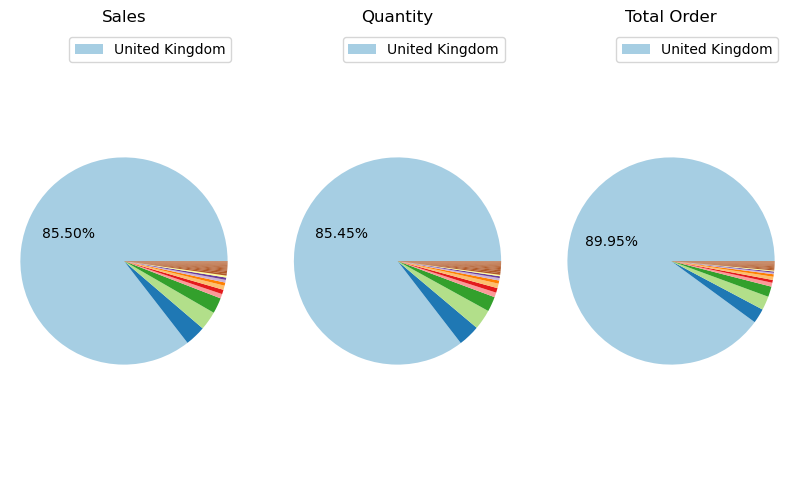

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,6))

def autopct(pct):
    return ('%1.2f%%' % pct) if pct > 80 else ''

# Pie chart for Sales by Country
p, t, a = ax1.pie(Sales_Country.Sales, autopct=autopct, colors=plt.cm.Paired(range(len(Sales_Country))))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Sales')

p, t, a = ax2.pie(Sales_Country.Quantity, autopct=autopct, colors=plt.cm.Paired(range(len(Sales_Country))))
ax2.axis('equal')
ax2.set_title('Quantity')

p, t, a = ax3.pie(Sales_Country.Total_Order, autopct=autopct, colors=plt.cm.Paired(range(len(Sales_Country))))
ax3.axis('equal')
ax3.set_title('Total Order')

# Normalize dataframe for legend
normsizes = Sales_Country.Sales / Sales_Country.Sales.sum() * 100
normsizes2 = Sales_Country.Quantity / Sales_Country.Quantity.sum() * 100
normsizes3 = Sales_Country.Total_Order / Sales_Country.Total_Order.sum() * 100

# Create handles and labels for legend, taking only those where value is > 1%
h, l = zip(*[(h, lab) for h, lab, i in zip(p, Sales_Country.index.values, normsizes) if i > 80])
h, j = zip(*[(h, lab) for h, lab, i in zip(p, Sales_Country.index.values, normsizes2) if i > 80])
h, k = zip(*[(h, lab) for h, lab, i in zip(p, Sales_Country.index.values, normsizes3) if i > 80])

# Add legends to each pie chart
ax1.legend(h, l, loc="best", bbox_to_anchor=(1, 1))
ax2.legend(h, j, loc="best", bbox_to_anchor=(1, 1))
ax3.legend(h, k, loc="best", bbox_to_anchor=(1, 1))


plt.show()


#### Note:

From the previous chart, we observed that over **80%** of transactions, in terms of total orders, sales, and quantity, are concentrated in the United Kingdom (UK) or domestic transactions. Now, let's identify which foreign markets are the most promising for online retail.

In [20]:
Foreign_Sales = Sales_Country.reset_index().query('Country != "United Kingdom"')
Foreign_Sales.head(10)

,Country,Total_Order,Sales,Quantity
1,Germany,6934,126673.74,78420
2,France,6535,115502.90,72293
3,EIRE,4920,95928.40,53805
4,Spain,1849,27338.06,16945
5,Switzerland,1313,26943.79,16635
6,Belgium,1527,25941.26,16325
7,Portugal,1176,18982.35,11214
8,Norway,717,16711.56,8772
9,Netherlands,576,13980.84,6703
10,Australia,467,11709.71,4876


<br>
<br>

After observing that most transactions originate from the United Kingdom (domestic transactions), the goal now is to examine foreign markets. The code extracts data for all **non-UK countries** and identifies the top-performing ones based on sales, quantity, and total orders.

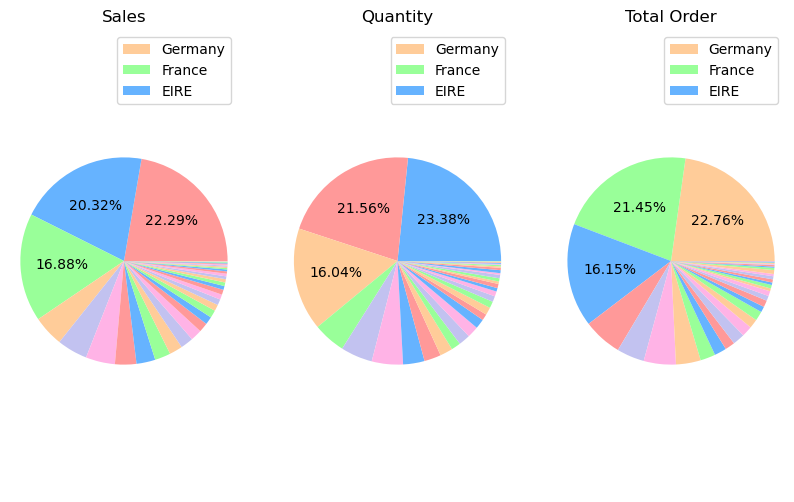

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,6))

def autopct(pct):
    return ('%1.2f%%' % pct) if pct > 15 else ''

# Define custom colors for each pie chart
colors1 = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']
colors2 = ['#66b3ff','#ff9999','#ffcc99','#99ff99','#c2c2f0','#ffb3e6']
colors3 = ['#ffcc99','#99ff99','#66b3ff','#ff9999','#c2c2f0','#ffb3e6']

p,t,a = ax1.pie(Foreign_Sales.Sales, autopct=autopct, colors=colors1)
p,t,a = ax2.pie(Foreign_Sales.Quantity, autopct=autopct, colors=colors2)
p,t,a = ax3.pie(Foreign_Sales.Total_Order, autopct=autopct, colors=colors3)
ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')

# normalize dataframe (not actually needed here, but for general case)
normsizes = Foreign_Sales.Sales/Foreign_Sales.Sales.sum()*100
normsizes2 = Foreign_Sales.Quantity/Foreign_Sales.Quantity.sum()*100
normsizes3 = Foreign_Sales.Total_Order/Foreign_Sales.Total_Order.sum()*100

# create handles and labels for legend, take only those where value is > 15
h,l = zip(*[(h,lab) for h,lab,i in zip(p,Foreign_Sales.Country.values,normsizes.values) if i > 15])
h,j = zip(*[(h,lab) for h,lab,i in zip(p,Foreign_Sales.Country.values,normsizes2.values) if i > 15])
h,k = zip(*[(h,lab) for h,lab,i in zip(p,Foreign_Sales.Country.values,normsizes3.values) if i > 15])
ax1.set_title('Sales')
ax2.set_title('Quantity')
ax3.set_title('Total Order')

ax1.legend(h, l,loc="best", bbox_to_anchor=(1,1))
ax2.legend(h, j,loc="best", bbox_to_anchor=(1,1))
ax3.legend(h, k,loc="best", bbox_to_anchor=(1,1))

plt.show()


The top **3** foreign transaction countries are Germany, France, and Ireland.

# **4.0 Sales MoM**
-----------------------

In this section, we will analyze the **month-over-month (MoM)** growth in sales and product quantity. Tracking MoM growth helps identify trends and patterns in customer purchasing behavior, allowing for a clearer understanding of sales performance over time. By evaluating the fluctuation in sales and product quantity across different months, we can gain insights into seasonal demand, promotional impacts, and potential growth opportunities for the business.

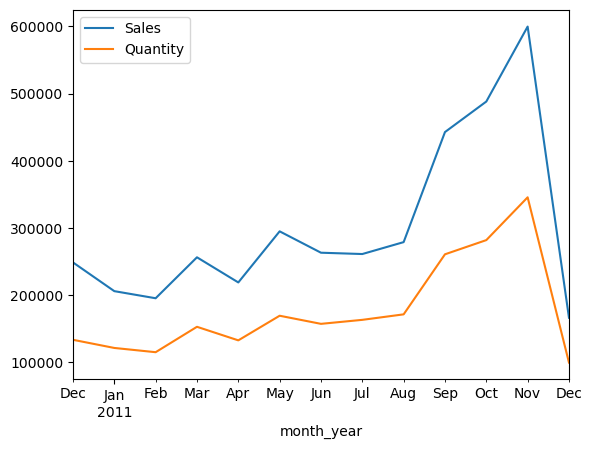

In [22]:
Sales_MoM = pd.DataFrame(new_df.groupby(['month_year']).agg({'Sales':'sum', 'Quantity':'sum'})).reset_index()
Sales_MoM.plot(x='month_year');

From the previous chart, we can observe that growth began around August and peaked in November 2011.

## 4.1 Top Sales by Product
----------------------------

In [23]:
# Top Sales by Product
Sales_Product = new_df.groupby(['Description']).agg({'InvoiceNo': ['nunique'],
                                      'InvoiceNo': 'count', 'Sales':'sum'}).rename(columns={'InvoiceNo':'Total_Order'}).sort_values('Sales', ascending=False)[0:10]

# Top Quantity by Product
Quantity_Product = new_df.groupby(['Description']).agg({'InvoiceNo': ['nunique'],
                                      'InvoiceNo': 'count', 'Quantity':'sum'}).rename(columns={'InvoiceNo':'Total_Order'}).sort_values('Quantity', ascending=False)[0:10]



# Print the top sales and quantity by product
print(Sales_Product)

print("\n" + "-"*60 + "\n")

print(Quantity_Product)


                                  Total_Order     Sales
Description                                            
PARTY BUNTING                            1268  34952.85
SPOTTY BUNTING                            972  23379.40
ASSORTED COLOUR BIRD ORNAMENT            1144  22848.80
JAM MAKING SET WITH JARS                  824  21137.25
HOT WATER BOTTLE KEEP CALM                723  20617.35
SET OF 3 CAKE TINS PANTRY DESIGN         1113  20583.97
CHILLI LIGHTS                             443  18379.80
CHOCOLATE HOT WATER BOTTLE                684  18308.10
RETROSPOT TEA SET CERAMIC 11 PC           806  17941.60
NATURAL SLATE HEART CHALKBOARD            936  17750.77

------------------------------------------------------------

                                    Total_Order  Quantity
Description                                              
PACK OF 72 RETROSPOT CAKE CASES             945     14986
ASSORTED COLOUR BIRD ORNAMENT              1144     13520
LUNCH BAG RED RETROSPOT          

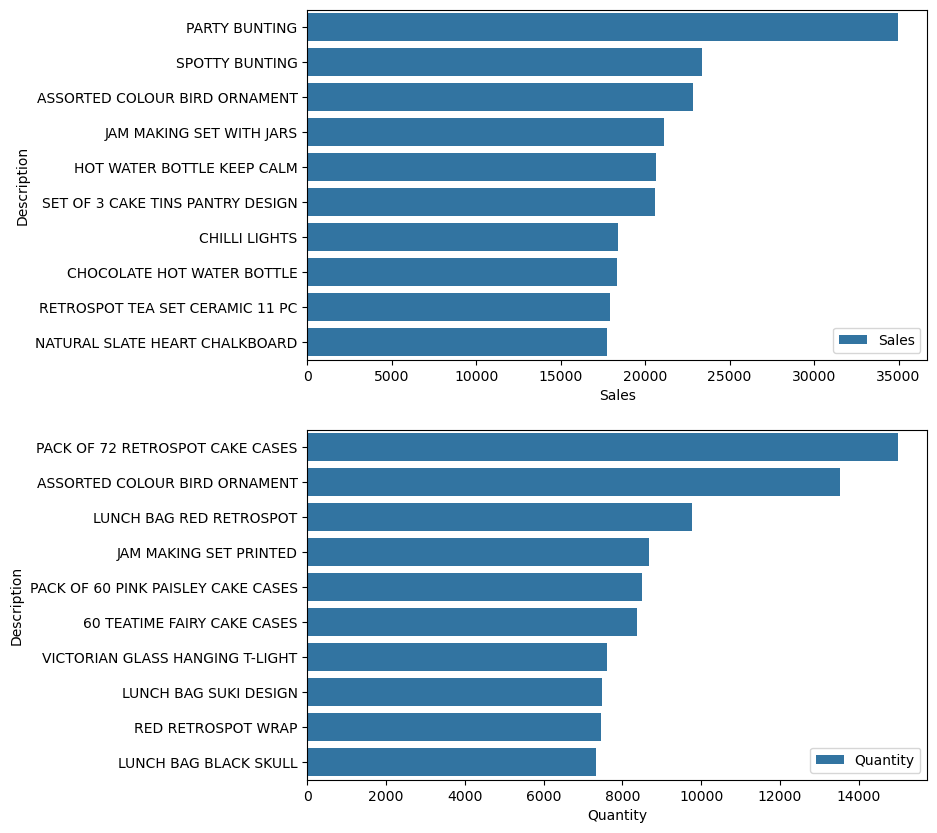

In [25]:
fig, axes = plt.subplots(2,figsize=(8, 10))

# Plot Sales by Product
sns.barplot(x='Sales', y=Sales_Product.index, data = Sales_Product,
            label="Sales", ax=axes[0])

# Plot Quantity by Product
sns.barplot(x='Quantity', y=Quantity_Product.index, data=Quantity_Product,
            label="Quantity", ax=axes[1])
plt.show()

#### Note:

This is quite intriguing. The differences between the Top 10 products by sales and the Top 10 products by quantity indicate that higher quantities sold **do not necessarily** result in higher sales revenue. To gain more insight, we should analyze the Top 10 products that not only have high quantities sold but also generate the **highest revenue**.

<br>

In [26]:
Quantity_Sales = Quantity_Product.merge(Sales_Product, left_index=True, right_index=True, how='inner')
Quantity_Sales

,Total_Order_x,Quantity,Total_Order_y,Sales
Description,,,,
ASSORTED COLOUR BIRD ORNAMENT,1144,13520,1144,22848.8


#### Note:

Indeed, the analysis reveals that **ASSORTED COLOUR BIRD ORNAMENT** stands out as the only product that ranks highest in both sales revenue and quantity sold. This finding highlights that this particular product not only generates the **highest sales** but also enjoys the **greatest demand** in the market. Retailers should focus on this product, as its strong performance in both sales and quantity indicates a significant market demand.

<br>
<br>

## 4.3 Highest and Lowest Month of Sales
-----------------------------------------

In the previous analysis, we observed that **November** exhibited the highest peak in transactions. To gain a clearer understanding of the sales patterns throughout the year, it's essential to identify the months that generated both the highest and lowest sales and quantities. This analysis will help us pinpoint specific months of peak performance and those with lower sales activity, offering valuable insights into seasonal trends and overall performance throughout the year.

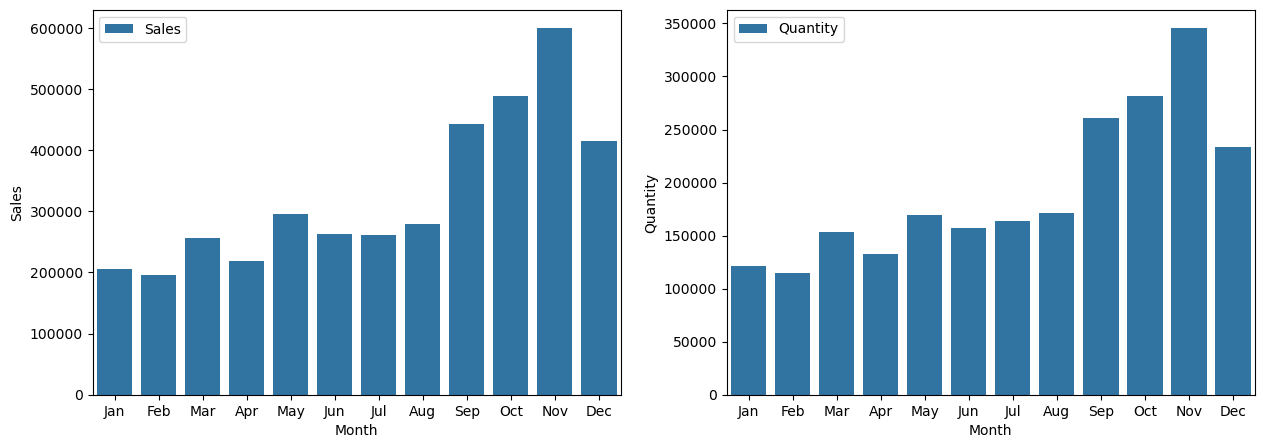

In [27]:
Monthly_Sales = new_df.groupby(['Month']).agg({'Sales':'sum', 'Quantity':'sum'})

# Reordering months to ensure correct sequence in the plot
months_ordered = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Monthly_Sales = Monthly_Sales.reindex(months_ordered)

# Creating subplots for visualizing sales and quantity by month
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x=Monthly_Sales.index, y='Sales', data = Monthly_Sales,
            label="Sales", ax=axes[0])
sns.barplot(x=Monthly_Sales.index, y='Quantity', data = Monthly_Sales,
            label="Quantity", ax=axes[1])
plt.show()
     

## 4.4 Highest Sales of Day
---------------------------

To gain further insights into sales patterns, we'll examine how sales and quantity vary by **day of the week**. Rather than focusing on total sales, we'll calculate the average sales and quantity for each day. It's important to note that there are no transactions on Saturdays. This analysis will help us identify which days of the week typically generate the highest average sales and quantities, providing a clearer understanding of daily sales performance and trends.

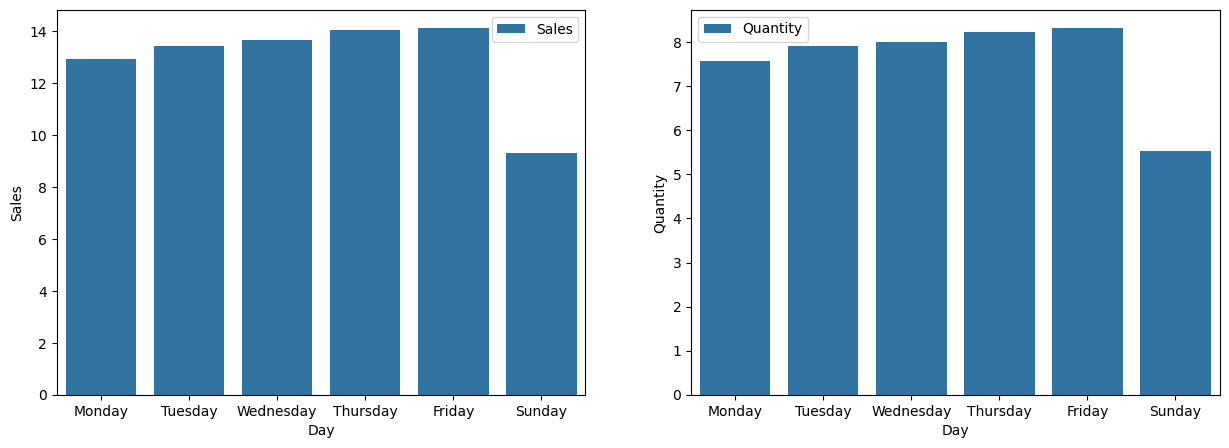

In [28]:
Day_Sales = new_df.groupby(['Day']).agg({'Sales':'mean', 'Quantity':'mean'})
day_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']
Day_Sales = Day_Sales.reindex(day_ordered)
fig, axes = plt.subplots(1,2,figsize=(15,5))

# Plotting the average sales by day of the week
sns.barplot(x=Day_Sales.index, y='Sales', data = Day_Sales,
            label="Sales", ax=axes[0])

# Plotting the average quantity sold by day of the week
sns.barplot(x=Day_Sales.index, y='Quantity', data = Day_Sales,
            label="Quantity", ax=axes[1])
plt.show()

It’s evident that **Friday** is the most popular day for shopping, while **Sunday** is the least favored day for transactions.

<br>

## 4.5 Hourly based highest sales

Now, we delve into the sales performance on an **hourly basis**. By examining the average sales and quantity of transactions throughout different hours of the day, we aim to identify peak shopping hours and understand customer purchasing behavior more granularly. This analysis helps in optimizing store operations and marketing strategies by focusing efforts during the most profitable times of the day.

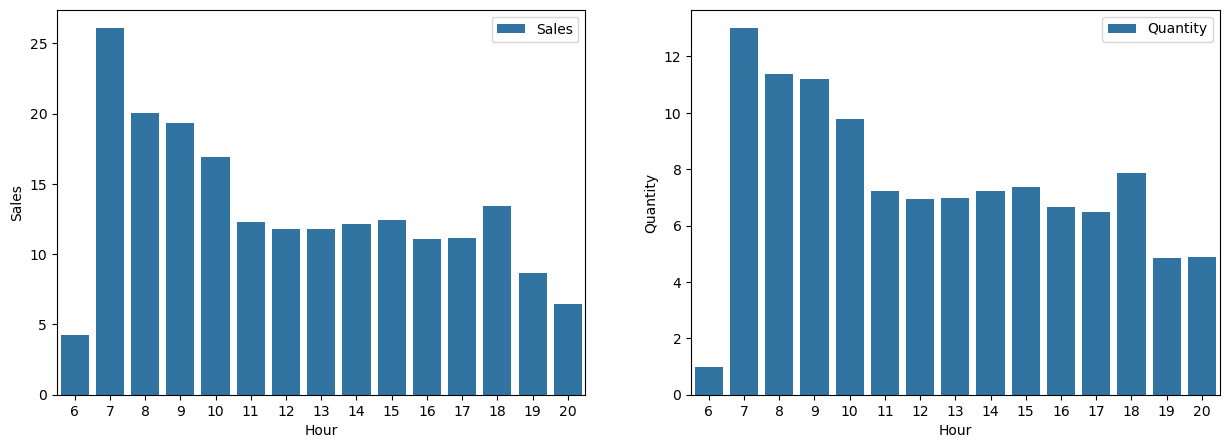

In [29]:
# Average sales and quantity by hour of the day
Hour_Sales = new_df.groupby(['Hour']).agg({'Sales':'mean', 'Quantity':'mean'})
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=Hour_Sales.index, y='Sales', data = Hour_Sales,
            label="Sales", ax=axes[0])
sns.barplot(x=Hour_Sales.index, y='Quantity', data = Hour_Sales,
            label="Quantity", ax=axes[1])
plt.show()

The peak period for transactions is in the **morning**, particularly around **7 a.m. and from 8 to 10 a.m**.

<br>

# **5. Customer**
-----------------------

#### Customer Demography

By analyzing customer data, we aim to gain insights into various demographic attributes, such as geographical location and purchasing behavior. This understanding will help identify key customer segments, tailor marketing strategies, and enhance customer experience based on their demographic profiles.

                CustomerID
Country                   
United Kingdom      272708
Germany               6934
France                6535
EIRE                  4920
Spain                 1849
Belgium               1527
Switzerland           1313
Portugal              1176
Norway                 717
Netherlands            576

------------------------------------------------------------



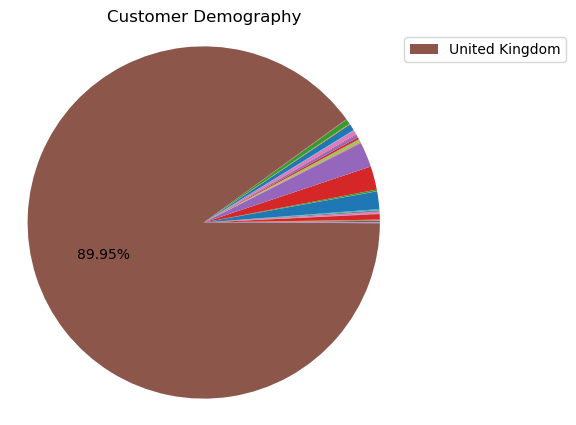

In [30]:
Customer_Demog = new_df.groupby('Country').agg({'CustomerID': ['nunique'],
                                      'CustomerID': 'count'})
print(Customer_Demog.sort_values('CustomerID', ascending=False)[0:10])

f, (ax) = plt.subplots(1, figsize=(5,5))
def autopct(pct):
    return ('%1.2f%%' % pct) if pct > 70 else ''

p,t,a = ax.pie(Customer_Demog.CustomerID, autopct=autopct)
ax.axis('equal')

# normalize dataframe (not actually needed here, but for general case)
normsizes = Customer_Demog.CustomerID/Customer_Demog.CustomerID.sum()*100

# create handles and labels for legend, take only those where value is > 1
h,l = zip(*[(h,lab) for h,lab,i in zip(p,Customer_Demog.index.values,normsizes.values) if i > 70])

ax.set_title('Customer Demography')
ax.legend(h, l,loc="best", bbox_to_anchor=(1,1))

print("\n" + "-"*60 + "\n")

plt.show()
     

Based on the previous chart, we observed that a significant majority of customers—over **80%** are from the United Kingdom (UK) or domestic sources. Now, let's investigate the distribution of foreign customers to identify the best foreign markets for online retail.

<br>

In [31]:
Foreign_Demog = Customer_Demog.reset_index().query('Country != "United Kingdom"')
Foreign_Demog.sort_values('CustomerID', ascending=False).head(10)

,Country,CustomerID
14,Germany,6934
13,France,6535
10,EIRE,4920
30,Spain,1849
3,Belgium,1527
32,Switzerland,1313
26,Portugal,1176
24,Norway,717
23,Netherlands,576
18,Italy,570


<br>
<br>
Noow, we are going to visualize the distribution of customers from different countries who have made purchases in the online retailer shop as shown in the dataset. 

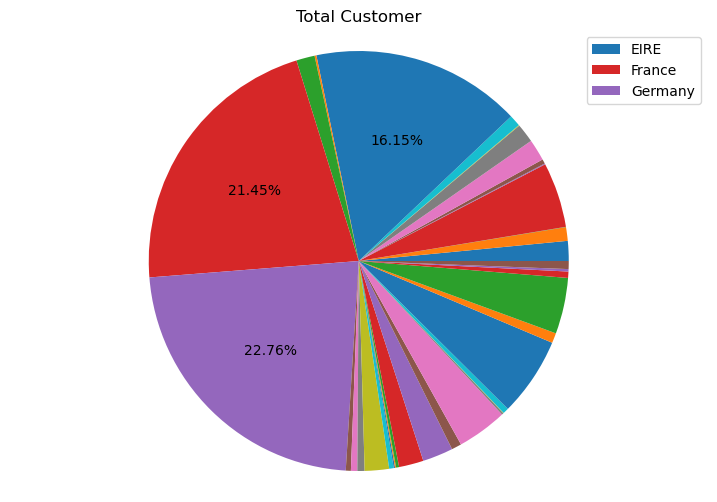

In [32]:
#Visualize the distribution of customers by country using a pie chart.

f, ax = plt.subplots(1, figsize=(9,6))

def autopct(pct):
    return ('%1.2f%%' % pct) if pct > 15 else ''

p,t,a = ax.pie(Foreign_Demog.CustomerID, autopct=autopct)
ax.axis('equal')

# normalize dataframe (This is not actually needed here, but for general case)
normsizes = Foreign_Demog.CustomerID/Foreign_Demog.CustomerID.sum()*100

# create handles and labels for legend, take only those where value is > 1
h,l = zip(*[(h,lab) for h,lab,i in zip(p,Foreign_Demog.Country.values,normsizes.values) if i > 15])
ax.set_title('Total Customer')
ax.legend(h, l,loc="best", bbox_to_anchor=(1,1))

plt.show()

Just like with transactions and quantities, the top foreign customers are predominantly from **Germany**, **France**, and **Ireland**.

## 5.1 Top Customer
-----------------------

In this section, we will identify the top customers who have contributed the most to **sales and quantity**. By analyzing the data, we aim to pinpoint which customers have generated the highest sales revenue and purchased the largest quantities, providing valuable insights into customer behavior and purchasing patterns.

In [33]:
Sales_Customer = new_df.groupby(['CustomerID']).agg({'Sales':'sum'}).sort_values('Sales', ascending=False)[0:10]
Quantity_Customer = new_df.groupby(['CustomerID']).agg({'Quantity':'sum'}).sort_values('Quantity', ascending=False)[0:10]
print(Sales_Customer)

               Sales
CustomerID          
14911.0     76424.67
13089.0     32957.08
14096.0     32949.41
17841.0     29176.25
14298.0     20823.48
12748.0     18388.33
14156.0     17179.68
13081.0     16012.81
15311.0     14220.87
17675.0     13717.15


In [34]:
print(Quantity_Customer)

            Quantity
CustomerID          
14911.0        45072
13089.0        18858
17841.0        17602
14298.0        14482
12748.0        13372
14096.0        11819
13081.0        11129
14156.0         7422
17735.0         7197
12921.0         7174


<br>
<br>

Now, let's visualize the top customers based on their **total sales** and **quantity of purchases**.

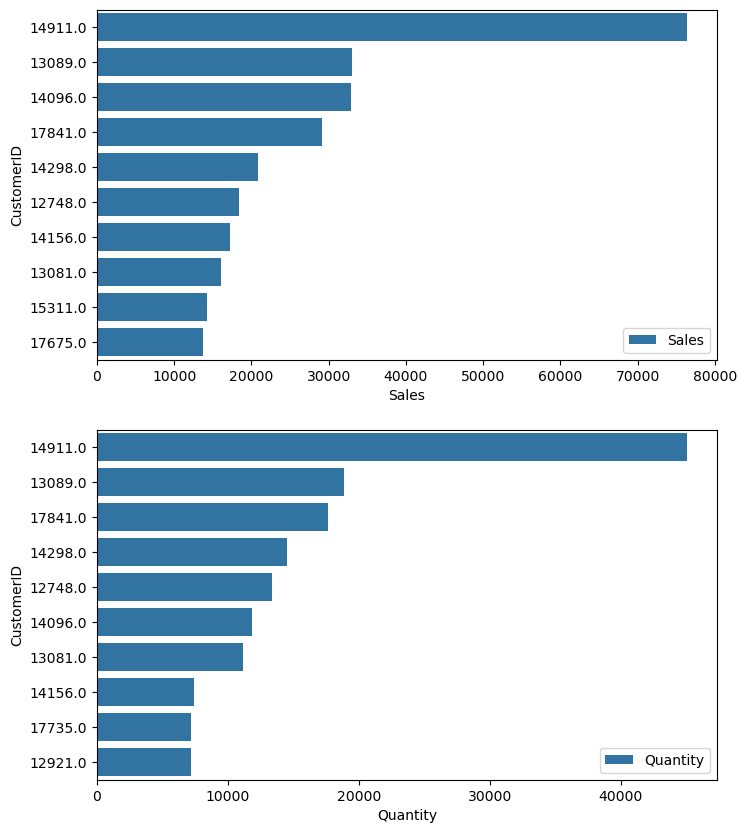

In [35]:
fig, axes = plt.subplots(2,figsize=(8, 10))

# based on total sales
sns.barplot(x='Sales', y=Sales_Customer.index, data = Sales_Customer,
            label="Sales", ax=axes[0])

# based on quantity of purchases
sns.barplot(x='Quantity', y=Quantity_Customer.index, data=Quantity_Customer,
            label="Quantity", ax=axes[1])
plt.show()
     

This shows that the customer with the **Customer ID: 14911** is the top customer based on their totals product sales and quality of purcheses.

<br>

Now, let's find out that Who is the customer that generated **BOTH** the highest quantity and sales?

In [36]:
Quantity_Sales_Cust = Quantity_Customer.merge(Sales_Customer, left_index=True, right_index=True, how='inner')
Quantity_Sales_Cust

,Quantity,Sales
CustomerID,,
14911.0,45072,76424.67
13089.0,18858,32957.08
17841.0,17602,29176.25
14298.0,14482,20823.48
12748.0,13372,18388.33
14096.0,11819,32949.41
13081.0,11129,16012.81
14156.0,7422,17179.68


It's fascinating to see that **8** customers are responsible for **both** the highest quantity purchases and the greatest sales revenue.

# **6.0 Order vs Sales**
-------------------------

In this section, we will analyze the relationship between the number of orders and the total sales revenue generated by customers. It is common for a single order to include multiple products. By identifying the top **10 customers** with the highest total number of orders, we can also determine the sales revenue they have generated. This analysis will provide insights into how order volume correlates with revenue and highlight key customers contributing significantly to sales.

In [37]:
Customer_Order = new_df.groupby('CustomerID').agg({'InvoiceNo': ['nunique'],
                                      'InvoiceNo': 'count', 'Sales':'sum'}).rename(columns={'InvoiceNo':'Total_Order'}).sort_values('Total_Order', ascending=False)[0:10]
Customer_Order
     

,Total_Order,Sales
CustomerID,,
17841.0,6504,29176.25
14911.0,4042,76424.67
14096.0,3968,32949.41
12748.0,3634,18388.33
14606.0,2087,6845.35
15311.0,1631,14220.87
13263.0,1435,5970.94
13089.0,1397,32957.08
15039.0,1086,11738.60


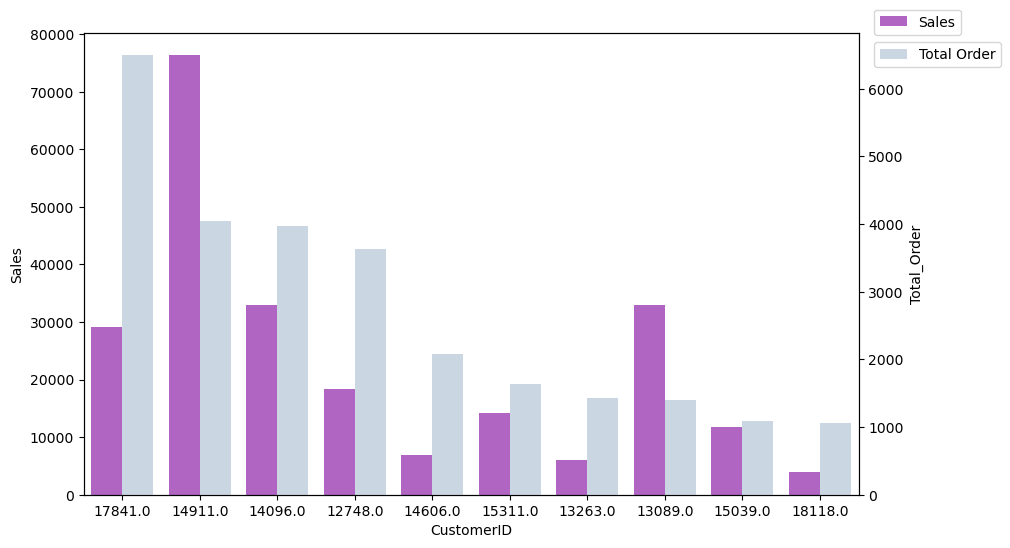

In [38]:
# Define colors for the bars
col1 = 'mediumorchid'
col2 = 'lightsteelblue'

# Create a new figure with a specific size
plt.figure(figsize=(10, 6))

# Plot Sales data on the primary y-axis
ax = sns.barplot(x=Customer_Order.index, y=Customer_Order.Sales, data=Customer_Order, label='Sales', color = col1)
width_scale = 0.5
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width_scale)
    ax.legend(bbox_to_anchor=(1.02, 1.05), loc='upper left', borderaxespad=0)

# Create a secondary y-axis for Total Orders
ax2 = ax.twinx()
sns.barplot(x =Customer_Order.index, y = Customer_Order.Total_Order, data=Customer_Order, alpha=0.7, color = col2, label = 'Total Order', ax=ax2)

# Adjust the width and position of Total Order bars
for bar in ax2.containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (1- width_scale))
    bar.set_width(w * width_scale)
    ax2.legend(bbox_to_anchor=(1.02, 0.98), loc='upper left', borderaxespad=0)
plt.show()

From the previous chart, we observed that **not all customers** with high transaction volumes also generate high sales revenue. In the following analysis, we will identify which customers rank in both the Top 10 for total orders and the Top 10 for sales revenue.

In [39]:
Order_Sales_Cust = Customer_Order.merge(Sales_Customer, left_index=True, right_index=True, how='inner')
Order_Sales_Cust

,Total_Order,Sales_x,Sales_y
CustomerID,,,
17841.0,6504,29176.25,29176.25
14911.0,4042,76424.67,76424.67
14096.0,3968,32949.41,32949.41
12748.0,3634,18388.33,18388.33
15311.0,1631,14220.87,14220.87
13089.0,1397,32957.08,32957.08


It's quite fascinating that there are **6 customers** who not only place the highest number of orders but also generate the most sales revenue.

<br>

Next, let's examine the **Average Revenue Per User (ARPU)** to understand the revenue we earn per transaction. ARPU is a **key metric** that measures the profitability of a product by calculating the average revenue generated from each user or subscriber.

In [40]:
customer_arpu = new_df.groupby('CustomerID').agg({'InvoiceNo': ['nunique'],
                                      'InvoiceNo': 'count', 'Sales':'sum'}).rename(columns={'InvoiceNo':'Total_Order'})

# Calculating the Average Revenue Per User (ARPU) by dividing total sales by the total number of orders for each customer.
customer_arpu['arpu'] = customer_arpu.Sales / customer_arpu.Total_Order

print("\n" + "-"*50 + "\n")

print(customer_arpu.describe())

print("\n" + "-"*50 + "\n")


--------------------------------------------------

       Total_Order         Sales         arpu
count  4173.000000   4173.000000  4173.000000
mean     72.650132    939.617012    16.633622
std     180.921991   1997.793054    11.446925
min       1.000000      1.900000     0.735217
25%      13.000000    179.440000     9.553939
50%      33.000000    425.770000    15.995000
75%      80.000000   1050.270000    19.379038
max    6504.000000  76424.670000   166.800000

--------------------------------------------------



In [41]:
print("\n" + "-"*50 + "\n")

print(customer_arpu.sort_values('arpu', ascending=False)[0:10])

print("\n" + "-"*50 + "\n")


--------------------------------------------------

            Total_Order  Sales        arpu
CustomerID                                
16716.0               1  166.8  166.800000
16319.0               3  404.4  134.800000
14434.0               8  964.8  120.600000
15269.0               1  118.8  118.800000
13147.0               2  237.6  118.800000
13261.0               6  670.5  111.750000
13763.0               2  218.4  109.200000
12882.0               9  924.6  102.733333
15619.0               1   99.6   99.600000
13188.0               1   99.6   99.600000

--------------------------------------------------



It's quite intriguing. The top **10 ARPU customers** are those who make relatively few transactions or orders. Next, let's examine the ARPU for the top 10 customers based on their sales.

## 6.1 Arpu TOP Customer
-------------------------

Now, we'll focus on identifying the top 10 customers based on their Average Revenue Per User (ARPU). By analyzing these top ARPU customers, we can gain insights into which customers generate the most revenue per transaction. This will help us understand the profitability of our highest-paying customers and their impact on overall sales.

In [42]:


Top_Arpu = customer_arpu.sort_values('Sales', ascending=False)[0:10]
Top_Arpu



,Total_Order,Sales,arpu
CustomerID,,,
14911.0,4042,76424.67,18.907637
13089.0,1397,32957.08,23.591324
14096.0,3968,32949.41,8.303783
17841.0,6504,29176.25,4.485893
14298.0,852,20823.48,24.440704
12748.0,3634,18388.33,5.060080
14156.0,765,17179.68,22.457098
13081.0,777,16012.81,20.608507
15311.0,1631,14220.87,8.719111


In [43]:

Top_Arpu.describe()


,Total_Order,Sales,arpu
count,10.000000,10.00000,10.000000
mean,2411.200000,27184.97300,16.188253
std,2007.549573,18818.67204,8.505240
min,542.000000,13717.15000,4.485893
25%,795.750000,16304.52750,8.407615
50%,1514.000000,19605.90500,19.758072
75%,3884.500000,32006.12000,23.307768
max,6504.000000,76424.67000,25.308395


<br>
<br>

Now, we will visualize the top **10 customers** with the **highest Average Revenue Per User (ARPU)**. The chart compares both the total sales and ARPU for these top customers.

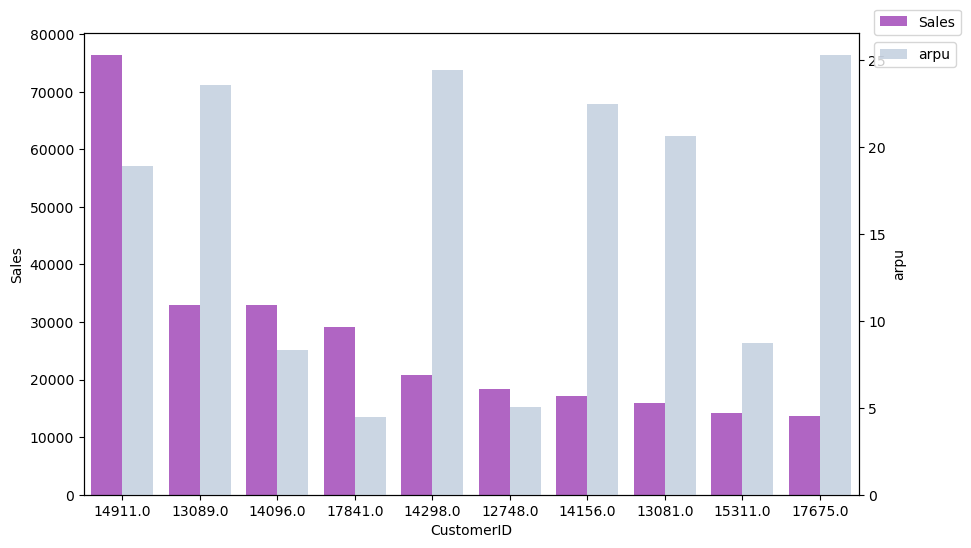

In [44]:
col1 = 'mediumorchid'
col2 = 'lightsteelblue'

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=Top_Arpu.index, y=Top_Arpu.Sales, data=Top_Arpu, label='Sales', color = col1)
width_scale = 0.5
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width_scale)
    ax.legend(bbox_to_anchor=(1.02, 1.05), loc='upper left', borderaxespad=0)

ax2 = ax.twinx()
sns.barplot(x =Top_Arpu.index, y =Top_Arpu.arpu, data=Top_Arpu, alpha=0.7, color = col2, label = 'arpu', ax=ax2)
for bar in ax2.containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (1- width_scale))
    bar.set_width(w * width_scale)
    ax2.legend(bbox_to_anchor=(1.02, 0.98), loc='upper left', borderaxespad=0)
plt.show()

The chart reveals a variation in ARPU relative to sales generated, indicating that a higher ARPU does not necessarily correspond to higher total sales. Additionally, it suggests that customers with higher ARPU among the top 10 tend to purchase more expensive items.

<br>
<br>

# **7.0 Customer Segmentation using RFM Analysis**
-------------------------------------------------------

In this section, we will explore Customer Segmentation through `RFM (Recency, Frequency, and Monetary) analysis`. RFM analysis is a powerful marketing technique that helps businesses categorize their customers based on their transaction behaviors. By analyzing the recency, frequency, and monetary value of customer interactions, we can identify key customer segments and tailor marketing strategies accordingly.


* **Recency** measures how recently a customer has made a purchase. This helps in identifying customers who are still actively engaged.
* **Frequency** tracks how often a customer makes a purchase, indicating their loyalty and purchasing habits.
* **Monetary** assesses how much money a customer spends, revealing their overall value to the business.


By applying RFM analysis, businesses can segment customers into various groups, such as `high-value`, `medium-value`, and `low-value customers`. This segmentation allows for more targeted marketing efforts and better resource allocation, ultimately enhancing customer relationship management and driving sales growth.

In [45]:

# import libraries
import datetime as dt

df_UK = new_df[new_df['Country'] == "United Kingdom"]
df_UK.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Year,Month,Day,Hour,month_year,Sales
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,20.34
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,11.10
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,2010-12-01,2010,Dec,Wednesday,8,2010-12,12.60


In [46]:
temp=['CustomerID', 'Quantity', 'InvoiceDate', 'Sales']
RFM_data=df_UK[temp]
RFM_data.shape

(272708, 4)

In [47]:
print(df_UK['InvoiceDate'].min())
print(df_UK['InvoiceDate'].max())
     

2010-12-01 08:26:00
2011-12-09 12:49:00


<br>
<br>
<br>

Let's prepare the **RFM (Recency, Frequency, Monetary)** table for customer segmentation analysis:




In [48]:
NOW = dt.datetime(2011,12,10)           # Define the reference date for recency calculations

#Convert ORDERDATE to datetime format.
RFM_data['InvoiceDate'] = pd.to_datetime(RFM_data['InvoiceDate'])

# Calculate the RFM metrics for each customer
RFM_table=RFM_data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days,
                                                'Quantity': lambda x: len(x.unique()), 
                                                'Sales': lambda x: x.sum()}) 

RFM_table['InvoiceDate'] = RFM_table['InvoiceDate'].astype(int)


# Rename columns for clarity
RFM_table.rename(columns={'InvoiceDate': 'recency', 
                         'Quantity': 'frequency',
                         'Sales': 'monetary_value'}, inplace=True)


RFM_table.head()           # Display the first few rows of the RFM table
     

,recency,frequency,monetary_value
CustomerID,,,
12747.0,2,10,2029.71
12748.0,0,22,18388.33
12749.0,3,10,2600.53
12820.0,3,10,905.92
12821.0,214,3,75.72


#### Insights:


* **Customer 12748.0:** Very recent transactions `(Recency = 0)`, high frequency `(22 transactions)`, and highest monetary value.
* **Customer 12747.0:** Recent transactions `(Recency = 2)`, moderate frequency `(10 transactions)`, and substantial monetary value.
* **Customer 12821.0:** Older transactions `(Recency = 214)`, low frequency `(3 transactions)`, and lower monetary value.

<br>
<br>

In [49]:
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,17.0,5.0,172.23
0.50,50.0,7.0,409.91
0.75,143.5,10.0,1007.75


<br>
<br>

In this section, we perform **RFM (Recency, Frequency, Monetary)** segmentation to categorize customers based on their purchasing behavior. The goal is to classify customers into different segments to better target marketing efforts.


In [50]:

# Converting quantiles to a dictionary, easier to use.
quantiles = quantiles.to_dict()

##  RFM Segmentation ----
RFM_Segment = RFM_table.copy()

# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

# Applying the classification functions to create quartile columns
RFM_Segment['R_Quartile'] = RFM_Segment['recency'].apply(R_Class, args=('recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['frequency'].apply(FM_Class, args=('frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['monetary_value'].apply(FM_Class, args=('monetary_value',quantiles,))

# Combining the quartile columns to form the RFM class
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)


# **8.0 Who are the lost customers?**
--------------------------------------

Now, we will identify customers who have been classified as `"lost"` based on their `RFM (Recency, Frequency, Monetary) scores`. These are customers whose recent activity, purchase frequency, and spending are all low. By focusing on the RFM class '111', which signifies low values across all three metrics, we can pinpoint the customers who are `least engaged` with the business. This analysis helps in understanding which customers have become inactive and may benefit from targeted re-engagement strategies.

In [51]:
#Customers who's recency, frequency as well as monetary values are low 

RFM_Segment[RFM_Segment['RFMClass']=='111'].sort_values('recency',ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
18011.0,373,5,63.03,1,1,1,111
13065.0,373,5,120.71,1,1,1,111
14237.0,373,4,77.45,1,1,1,111
17643.0,373,3,58.80,1,1,1,111
15350.0,373,2,115.65,1,1,1,111


# **9.0 Who are loyal customers?**
-------------------------------------

In this section, we focus on identifying **loyal customers** based on their `RFM (Recency, Frequency, Monetary) scores`, specifically looking at those with high frequency values. `Loyal customers` are characterized by their **frequent purchases**, which often indicates a strong and ongoing relationship with the business. By examining customers who fall into the higher quartiles for frequency, we can identify those who have demonstrated consistent purchasing behavior.

In [52]:
#Customers with high frequency value

RFM_Segment[RFM_Segment['F_Quartile'] >= 3 ].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
13089.0,4,15,32957.08,4,4,4,444
14096.0,4,26,32949.41,4,4,4,444
17841.0,1,25,29176.25,4,4,4,444
14298.0,8,12,20823.48,4,4,4,444
12748.0,0,22,18388.33,4,4,4,444


<br>
<br>

Now, let's count the number of **unique RFM segments** to understand the diversity of customer profiles based on their `recency`, `frequency`, and `monetary values`. This will provide insight into how many distinct customer segments exist within the dataset.

In [53]:

# Count num of unique segments
RFM_count_unique = RFM_Segment.groupby('RFMClass')['RFMClass'].nunique()
print(RFM_count_unique.sum())

# Calculate RFM_Score
RFM_Segment['RFM_Score'] = RFM_Segment[['R_Quartile','F_Quartile','M_Quartile']].sum(axis=1)
print(RFM_Segment['RFM_Score'].head())


63
CustomerID
12747.0    11
12748.0    12
12749.0    11
12820.0    10
12821.0     3
Name: RFM_Score, dtype: int64


# **10.0 Defining Customer Segments with RFM Levels**
------------------------------------------------------


In [54]:

# Define FMCG_rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal/Commited'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Requires Attention'
    else:
        return 'Demands Activation'
        
# Create a new variable RFM_Level
RFM_Segment['RFM_Level'] = RFM_Segment.apply(rfm_level, axis=1)

# Printing the header with top 15 rows 
RFM_Segment.head(10)


,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12747.0,2,10,2029.71,4,3,4,434,11,Can't Loose Them
12748.0,0,22,18388.33,4,4,4,444,12,Can't Loose Them
12749.0,3,10,2600.53,4,3,4,434,11,Can't Loose Them
12820.0,3,10,905.92,4,3,3,433,10,Can't Loose Them
12821.0,214,3,75.72,1,1,1,111,3,Demands Activation
12822.0,70,8,743.28,2,3,3,233,8,Champions
12824.0,59,4,306.22,2,1,2,212,5,Promising
12826.0,2,9,1367.80,4,3,4,434,11,Can't Loose Them
12827.0,5,5,375.05,4,1,2,412,7,Loyal/Commited


## **10.1 Insights from Customer Segmentation**
---------------------------------------------------

This segmentation allows for targeted marketing strategies by identifying customers who are the most valuable and engaged, as well as those who may need additional incentives to increase their value to the business.

1. **Top-Performing Customers:**

    Customers with high RFM scores (e.g., `CustomerIDs 12748.0`, `12747.0`, and `12826.0`) are classified as **"Can't Lose Them."** These customers have a high recency, frequency, and monetary value, indicating that they are highly engaged and generate significant revenue. Retaining these customers should be a `top priority`, and personalized marketing strategies or loyalty programs could be beneficial to maintain their high level of engagement.

  
2. **Champions:**

    The customer with `CustomerID 12822.0` falls into the **"Champions"** category. These customers have high frequency and monetary values but slightly lower recency scores compared to the `"Can't Lose Them"` group. They are valuable customers but may need strategies to keep them engaged more consistently.

3. **Promising and Loyal Customers:**

    Customers such as `12824.0 (Promising)` and `12827.0 (Loyal/Committed)` have decent frequency and monetary values but lower recency scores. This suggests that while these customers engage and spend a good amount, their recent activity is `less frequent`. **Special promotions or re-engagement campaigns** could help improve their recency scores and potentially move them into the higher-value segments.

  
4. **At-Risk Customers:**

    Customers with low RFM scores, such as `CustomerID 12821.0 (Demands Activation)`, show low values across recency, frequency, and monetary metrics. These customers have not engaged recently and have `minimal transactions and spending`. Strategies for **reactivation or targeted offer**s could help recover these customers or at least understand why their engagement has declined.

  
5. **Revenue Insights:**

    The high monetary value of some customers (e.g., `CustomerIDs 12748.0` and `12749.0`) emphasizes the importance of focusing on `high-spending customers` for maximizing revenue. Analyzing the purchasing patterns of these customers can provide insights into which products or services drive their high spending.

  
6. **Customer Segmentation Strategy:**

    The segmentation into distinct RFM levels provides actionable insights for different customer groups. `Tailoring marketing efforts based on these segments` can optimize resource allocation and enhance customer satisfaction and loyalty. For example, creating **exclusive offers** for the "Can't Lose Them" group and special incentives for "Loyal/Committed" customers can improve overall engagement and sales.


By leveraging these insights, businesses can develop targeted marketing strategies to enhance customer relationships, optimize spending, and improve overall business performance.




# **11.0 Analyzing RFM Segments**
--------------------------------------


Calculate the average values for each **RFM_Level** and determine the size of each segment.



In [55]:
rfm_level_agg = RFM_Segment.groupby('RFM_Level').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': ['mean', 'count']
}).round(1)

# Print the aggregated dataset
print(rfm_level_agg)

                   recency frequency monetary_value      
                      mean      mean           mean count
RFM_Level                                                
Can't Loose Them      25.7      11.0         1869.0  1420
Champions             66.2       8.1          598.4   358
Demands Activation   257.8       3.0           87.1   373
Loyal/Commited        80.1       6.8          457.7   401
Potential             98.5       5.7          290.2   408
Promising            123.1       4.8          219.1   429
Requires Attention   169.1       4.0          148.1   378


---------------------------------------------------
## **10.1 Insights from RFM Segmentation Analysis**
---------------------------------------------------

This segmentation allows for targeted marketing strategies by identifying customers who are the most valuable and engaged, as well as those who may need additional incentives to increase their value to the business.

1. **High-Value Customers:**

   - **Can't Loose** Them segment is the most valuable, with the highest average 1monetary value of $18691. They also have the `lowest recency (25.7 days)` and `high frequency (11.0)`. This indicates they are frequent, recent, and high-spending customers, representing **1420 individuals**.
<br>

2. **Top-Performing Segments:**

    - **Champions** have a decent average `monetary value ($598.4)` and relatively `high recency (66.2 days)` and `frequency (8.1)`. This segment comprises **358 customers** and, while not as valuable as the "Can't Loose Them" segment, they are still strong performers.

<br>

3. **Low-Engagement Segments:**

    - **Demands Activation** has the `highest recency (257.8 days)` and `lowest frequency (3.0)`, along with the lowest average `monetary value ($87.1)`. With **373 customers**, this segment is less engaged and less profitable.

<br>

4. **Moderate Performers**

   -  **Loyal/Committed and Potential** segments show moderate average monetary values (`$457.7` and `$290.2`, respectively) and `frequency rates (6.8 and 5.7)`. They have higher recency compared to the "Can't Loose Them" segment but are still significant in terms of revenue and engagement, with **401 and 408 customers** respectively.

<br>
  
5. **Lower Value and Engagement:**

    - **Promising and Requires Attention** segments have lower average monetary values (`$219.1` and `$148.1`, respectively) and frequencies (`4.8 and 4.0`). Their recency is also higher, indicating these customers are less frequent and less recent, with **429 and 378 individuals** in these segments.

<br>
  





# ------------------------------------END----------------------------------------------